In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Training data (non-normalized)
x_train = np.random.uniform(1, 100000, size=(60, 3))

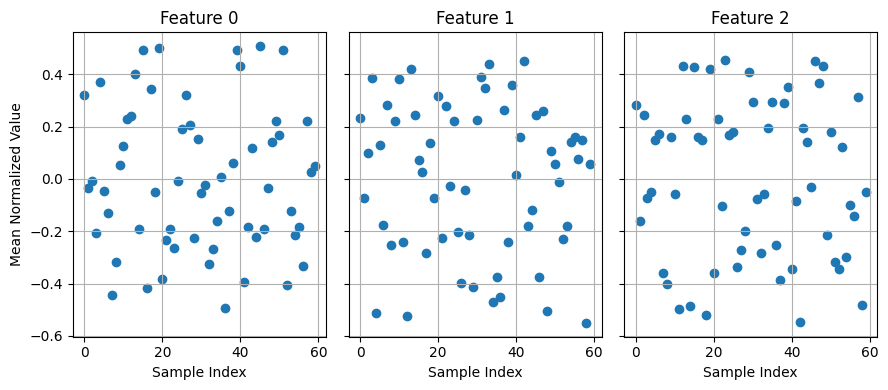

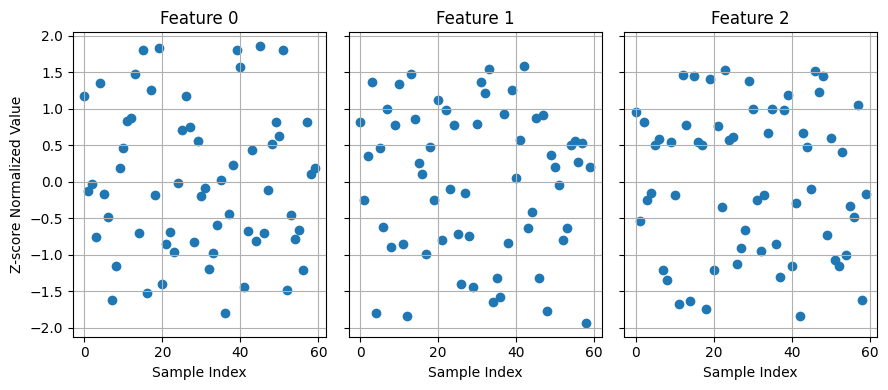

In [35]:
# Mean Normalization
x_mean_normalized = mean_normalization(x_train)

# Graph
num_features = x_mean_normalized.shape[1]
fig, axes = plt.subplots(1, num_features, figsize=(3*num_features, 4), sharey=True)

for i in range(num_features):
    axes[i].scatter(range(x_mean_normalized.shape[0]), x_mean_normalized[:, i])
    axes[i].set_title(f"Feature {i}")
    axes[i].set_xlabel("Sample Index")
    axes[i].grid(True)

axes[0].set_ylabel("Mean Normalized Value")
plt.tight_layout()
plt.show()

# Z-score Normalization
z_score_normalized = z_score_normalization(x_train)

# Graph
num_features = z_score_normalized.shape[1]
fig, axes = plt.subplots(1, num_features, figsize=(3*num_features, 4), sharey=True)

for i in range(num_features):
    axes[i].scatter(range(z_score_normalized.shape[0]), z_score_normalized[:, i])
    axes[i].set_title(f"Feature {i}")
    axes[i].set_xlabel("Sample Index")
    axes[i].grid(True)

axes[0].set_ylabel("Z-score Normalized Value")
plt.tight_layout()
plt.show()

In [34]:
# Mean normalization O(n * m)
def mean_normalization(x):
    x = x.copy()
    m, n = x.shape
    
    for c in range(n): # for each feature
        mean = np.mean(x[:, c])
        maxx = np.max(x[:, c])
        minn = np.min(x[:, c])
        # print(f"mean = {mean}, maxx = {maxx}, minn = {minn}")

        # normalizing each column
        if maxx != minn:
            for r in range(m):
                # print((x[r][c] - mean) / (maxx - minn))
                x[r][c] = (x[r][c] - mean) / (maxx - minn)
                # print(x[r][c])

    return x # returning normalized version

# Z-score normalization
def z_score_normalization(x):
    x = x.copy()
    m, n = x.shape

    for c in range(n): # for each feature
        mean = np.mean(x[:, c])
        std = np.std(x[:, c])
    
        if std != 0:
            for r in range(m):
                x[r][c] = (x[r][c] - mean) / std

    return x